<a href="https://colab.research.google.com/github/Stitaprajna/AllMyProjects/blob/main/Recommendation%20Model%20for%20Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/data.csv', encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
len(df)

541909

In [5]:
len(df.CustomerID.value_counts())

4372

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df1 = df[df.Quantity>=0]

In [8]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [10]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
df2 = df1[~df1.Description.isnull()]

In [12]:
df2.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132769
Country             0
dtype: int64

In [13]:
df2[df2.CustomerID.isnull()].Country.value_counts()

United Kingdom    131349
EIRE                 656
Hong Kong            284
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                1
Name: Country, dtype: int64

In [14]:
len(df2)

530693

In [25]:
df3 = df2[df2.CustomerID.isnull()] # customers with unknown customer id
df4 = df2[~df2.CustomerID.isnull()] # customers with known customer id

Firstly, we will look at the Customers with known IDs and then the unknown IDs. The Product Categories are found out through text cleaning ,**Bag of Words**, Frequency Approximation and **Reverse one Hot Encoding**. We, will use it in the next section, but it was actually done just after the next section.

# Customers with Known CustomerID

In [16]:
customers= pd.DataFrame(df4.CustomerID.value_counts())
customers

,CustomerID
17841.0,7847
14911.0,5677
14096.0,5111
12748.0,4596
14606.0,2700
...,...
15313.0,1
17846.0,1
13185.0,1
16953.0,1


So, we have in total $4339$ customers and we have to divide them into different **Customer Categories**.

In [ ]:
q1 = []
for id in customers.index:
  q1.append(sum(df4[df.CustomerID == id].Quantity))

In [177]:
Customers = pd.DataFrame({'CustomerID': customers.index, 'Total Quantity': q1 }).sort_values('Total Quantity', ascending = False)
Customers.index = np.arange(0,4339,1)
Customers

,CustomerID,Total Quantity
0,15478.0,81527
1,17841.0,71495
2,14911.0,48075
3,15039.0,30526
4,12748.0,26168
...,...,...
4334,15450.0,0
4335,16680.0,0
4336,14788.0,0
4337,15432.0,0


##### We will divide the customers into three categories based on the Quantities of Purchase:

#####(i) Most Valuable Customers

#####(ii) Valuable Customers

#####(iii) Low Valued Customers

## Most Valued Customers (Top 50 Customers)

In [180]:
c1 = Customers.iloc[0:50]
c1

,CustomerID,Total Quantity
0,15478.0,81527
1,17841.0,71495
2,14911.0,48075
3,15039.0,30526
4,12748.0,26168
5,15005.0,25377
6,14606.0,24520
7,13089.0,24287
8,14298.0,24047
9,15311.0,20739


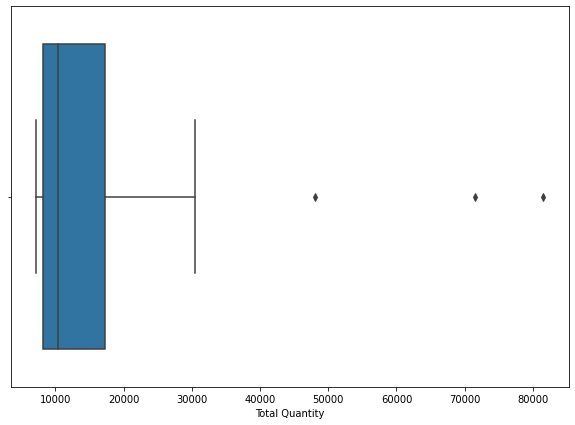

In [191]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.boxplot(c1['Total Quantity'])
plt.rcParams['figure.figsize'] = [10,7]

The boxplot shows a shift of median towards left, that means mean number of products purchased is much larger than the median ie. $10,000$ products. This happens because '**The Top Customers**' are buying quantities much more than others. Such, a curve is called '**Right-Skewed**'.

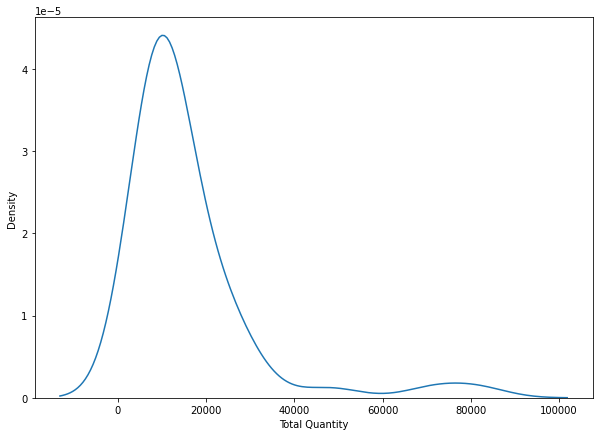

In [196]:
sns.distplot(c1['Total Quantity'],hist=False)
plt.rcParams['figure.figsize'] = [10,7]

The tail of the distribution is towards 'right'. This confirms that this is a '**Right-Skewed**'. Finally, we can confirm this through **Statistical Measures**.

In [193]:
pd.DataFrame(c1['Total Quantity'].describe())

,Total Quantity
count,50.000000
mean,15780.880000
std,14793.767326
min,7174.000000
25%,8155.750000
50%,10391.000000
75%,17205.000000
max,81527.000000


The mean is much greater than the median. This again proves what we stated above. 

### Top 20 Product Categories for our Most valuable Customers 

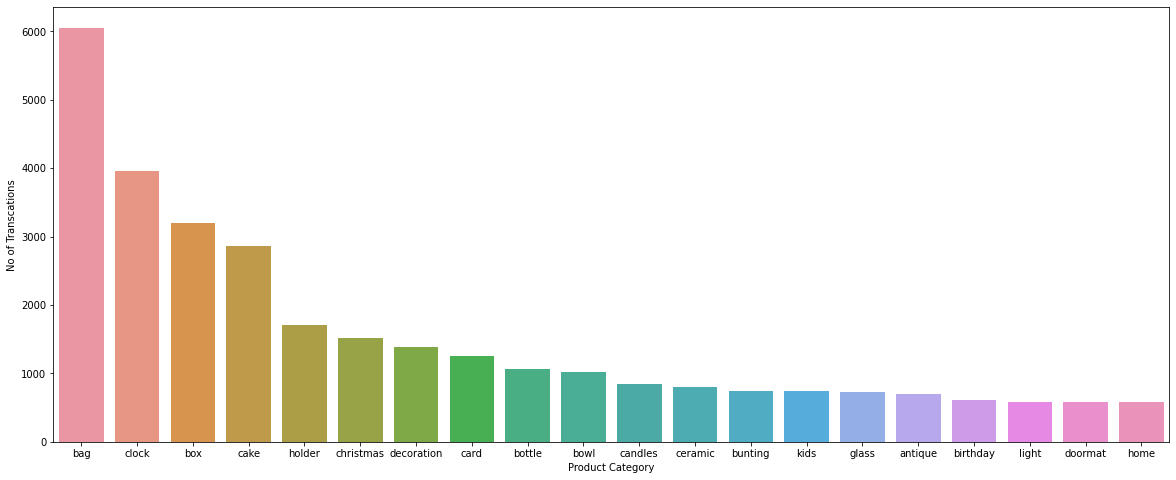

In [291]:
c2 = pd.DataFrame(df6[df6.CustomerID.isin(list(c1.CustomerID))].Category.value_counts())
c3 = pd.DataFrame({'Product Category': c2.index, 'No of Transcations': c2.Category }).iloc[0:20]
c3.index = np.arange(0,20, 1)
sns.barplot(x = 'Product Category', y='No of Transcations', data = c3 )
plt.rcParams['figure.figsize'] = [20,8]

We can give discounts on these product categories so that we can have more sale.

## Valuable Customers (50 - 500)

In [220]:
d1 = Customers.iloc[50:500]
d1.head(50)

,CustomerID,Total Quantity
50,15498.0,7110
51,15491.0,7038
52,14534.0,6990
53,13408.0,6974
54,16931.0,6730
55,15811.0,6680
56,15033.0,6627
57,15547.0,6627
58,15073.0,6588
59,13001.0,6588


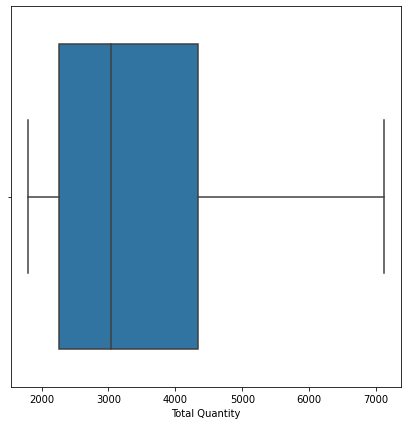

In [219]:
sns.boxplot(d1['Total Quantity'])
plt.rcParams['figure.figsize'] = [7,7]

The box-plot shows that, the distrubution is somewhat '**Right Skewed**', and there are no anomalies here. That means our distribution is not driven by the very large or very small values.

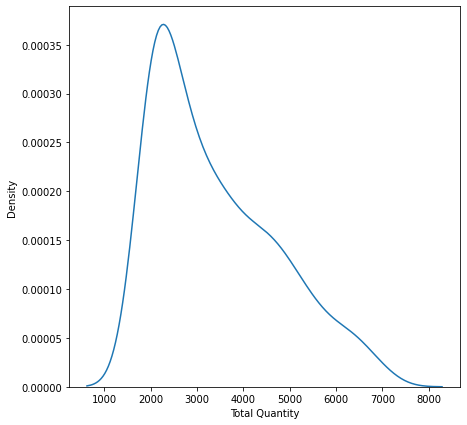

In [221]:
sns.distplot(d1['Total Quantity'],hist=False)
plt.rcParams['figure.figsize'] = [10,7]

The distribution somewhat looks '**Right-Tailed**', but the distribution is not very 'Normal'. We, can make it normal through '**Log-Transformation**'.

In [222]:
pd.DataFrame(d1['Total Quantity'].describe())

,Total Quantity
count,450.000000
mean,3401.326667
std,1335.788216
min,1804.000000
25%,2255.250000
50%,3036.500000
75%,4341.500000
max,7110.000000


### Top 20 Product Categories of our Valuable Customers

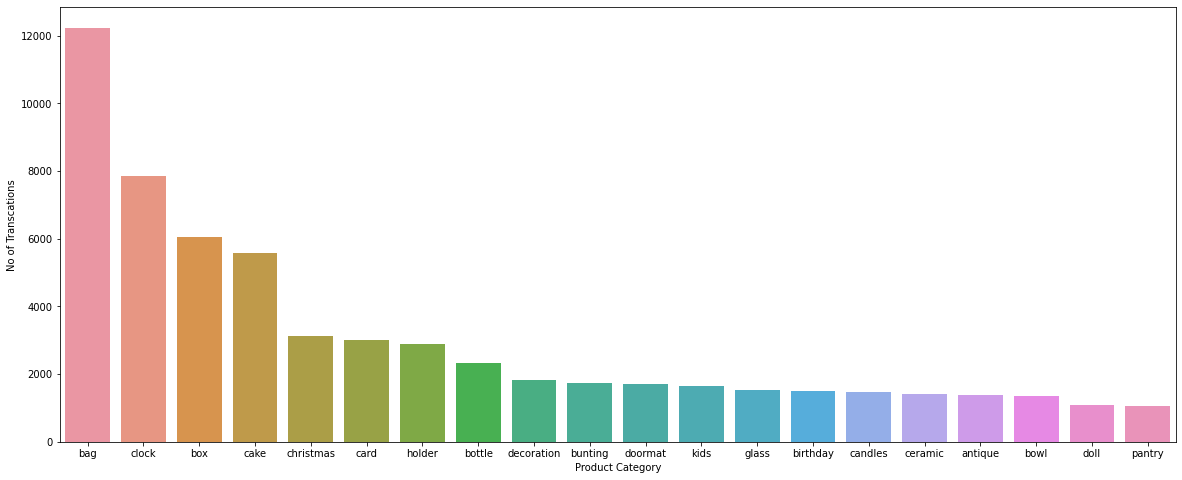

In [289]:
d2 = pd.DataFrame(df6[df6.CustomerID.isin(list(d1.CustomerID))].Category.value_counts())
d3 = pd.DataFrame({'Product Category': d2.index, 'No of Transcations': d2.Category }).iloc[0:20]
d3.index = np.arange(0,20, 1)
sns.barplot(x = 'Product Category', y='No of Transcations', data = d3 )
plt.rcParams['figure.figsize'] = [20,8]

These are the top product categories for our Valuable Customers. We, can target these categories and increase our profits.

## Low-Valued Customers (500-4339)

In [225]:
e1 = Customers.iloc[500:]
e1.head(50)

,CustomerID,Total Quantity
500,15527.0,1796
501,14907.0,1793
502,13505.0,1793
503,13593.0,1789
504,17047.0,1784
505,14961.0,1780
506,13090.0,1779
507,17716.0,1778
508,14472.0,1778
509,17211.0,1777


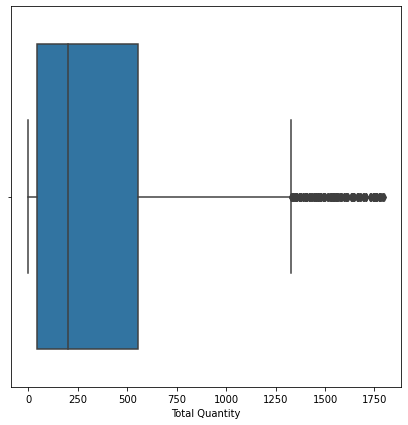

In [228]:
sns.boxplot(e1['Total Quantity'])
plt.rcParams['figure.figsize'] = [7,7]

The box-plot shows that this distribution is having a lot of anomalous point, thus the mean of the this distrubution might be in the higher sight. This makes this distribution '**Right-Skewed**'.

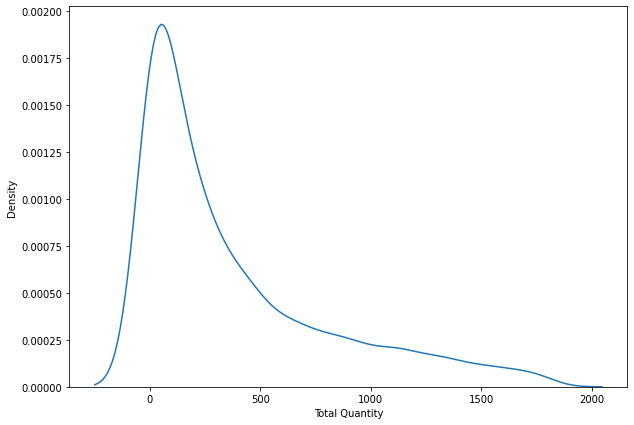

In [235]:
sns.distplot(e1['Total Quantity'],hist=False)
plt.rcParams['figure.figsize'] = [10,7]

As, this is a '**Right-Tailed**' distribution, thus its a '**Right-Skewed**' distribution. Lets do a Statistical Analysis and check this out.

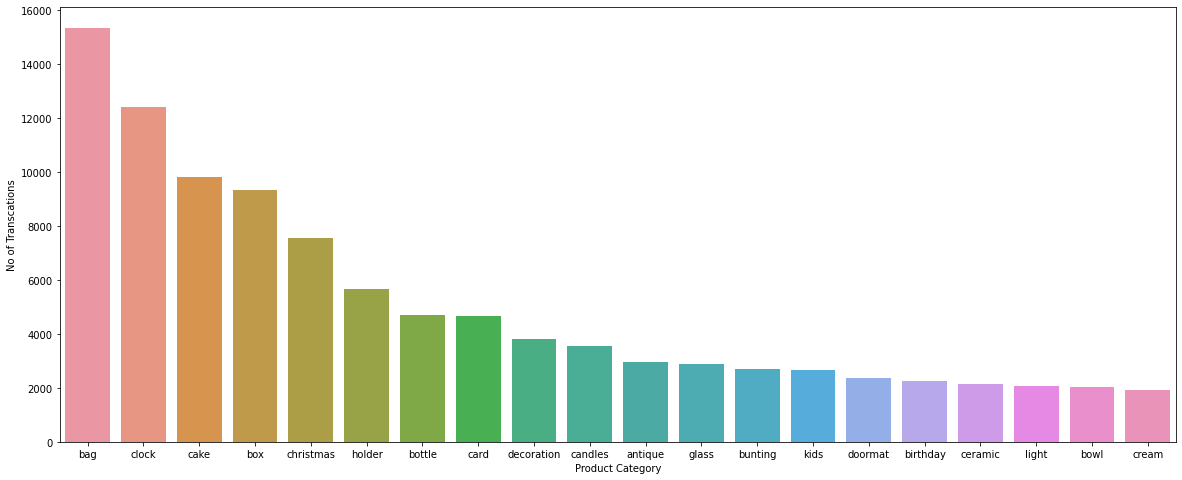

In [287]:
e2 = pd.DataFrame(df6[df6.CustomerID.isin(list(e1.CustomerID))].Category.value_counts())
e3 = pd.DataFrame({'Product Category': e2.index, 'No of Transcations': e2.Category }).iloc[0:20]
e3.index = np.arange(0,20, 1)
sns.barplot(x = 'Product Category', y='No of Transcations', data = e3 )
plt.rcParams['figure.figsize'] = [20,8]

Although, these customers are less-valued, but there a some product categories in which we see more sale. So, we can give discount in these categories to increase our profit.

## Creating the Product Categories based on the Products

#### Pre-Processing

In [ ]:
import re
df4['Description'] = df4.Description.apply(lambda x: re.sub('[^a-zA-Z]',' ',x))

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
l11 = cv.fit_transform(df4.Description)
ll1 = pd.DataFrame(l11.toarray(),columns=cv.get_feature_names())

In [285]:
ll1.head()

,abc,abstract,acapulco,account,acrylic,address,ade,adult,advent,afghan,...,wrapping,wreath,wrecking,writing,xmas,yellow,you,your,yuletide,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
features = []
for i in ll1.columns:
  if sum(ll1[i]) > 1000:
    features.append(i)

In [19]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [21]:
ll2 = ll1[features]

In [22]:
st = []
for i in features:
  if i in stopwords.words('english'):
    st.append(i)

In [74]:
color = ['red', 'orange', 'yellow', 'green', 'blue', 'black', 'brown']

In [75]:
for i in color:
  if i in ll2.columns:
    print(i)

red
yellow
green
blue
black


In [107]:
adjectives = ['metal','happy','heart', 'assorted', 'acrylic', 'design', 'set']
noun = ['bird', 'pack', 'animals','sign']
left = ['retrospot', 'colour']

In [ ]:
ll2.drop(st,axis=1,inplace=True)
ll2.drop(adjectives, axis=1, inplace=True)
ll2.drop(noun, axis=1, inplace=True)
ll2.drop(['red', 'yellow', 'green', 'blue', 'black'],axis=1,inplace=True)
ll2.drop(left,axis=1,inplace=True)

In [284]:
ll2.head()

,alarm,alphabet,ant,antique,apple,apples,apron,art,babushka,baby,...,white,wicker,wire,wood,wooden,woodland,word,wrap,wreath,zinc
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [242]:
j1 = ll2.idxmax(axis=1)

In [243]:
len(j1)

397924

In [244]:
df4.index = np.arange(0,len(j1),1)
df5 = pd.concat([df4,j1],axis=1)
df5.rename(columns={0: 'Category'},inplace=True)

In [293]:
df5.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Category
0,536365,85123A,WHITE HANGING HEART T LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,hanging
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,coat
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,white


In [271]:
df5.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Category'],
      dtype='object')

In [272]:
cols = ['CustomerID', 'Description','Category', 'Quantity', 'InvoiceNo', 'InvoiceDate',
       'UnitPrice','StockCode', 'Country']

In [273]:
df6 = df5[cols]

In [294]:
df6.head()

,CustomerID,Description,Category,Quantity,InvoiceNo,InvoiceDate,UnitPrice,StockCode,Country
0,17850.0,WHITE HANGING HEART T LIGHT HOLDER,holder,6,536365,12/1/2010 8:26,2.55,85123A,United Kingdom
1,17850.0,WHITE METAL LANTERN,lantern,6,536365,12/1/2010 8:26,3.39,71053,United Kingdom
2,17850.0,CREAM CUPID HEARTS COAT HANGER,coat,8,536365,12/1/2010 8:26,2.75,84406B,United Kingdom
3,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE,bottle,6,536365,12/1/2010 8:26,3.39,84029G,United Kingdom
4,17850.0,RED WOOLLY HOTTIE WHITE HEART,white,6,536365,12/1/2010 8:26,3.39,84029E,United Kingdom


In [275]:
df6['Category'] = df6['Category'].str.replace('hanging', 'holder')
df6['Category'] = df6['Category'].str.replace('baking', 'cake')
df6['Category'] = df6['Category'].str.replace('alarm', 'clock')
df6['Category'] = df6['Category'].str.replace('boxes', 'box')
df6['Category'] = df6['Category'].str.replace('cakes', 'cake')
df6['Category'] = df6['Category'].str.replace('decorations', 'decoration')
df6['Category'] = df6['Category'].str.replace('dolly', 'doll')
df6['Category'] = df6['Category'].str.replace('bells', 'bell')
df6['Category'] = df6['Category'].str.replace('childs', 'kids')
df6['Category'] = df6['Category'].str.replace('childrens', 'kids')
df6['Category'] = df6['Category'].str.replace('diner', 'dinner')
df6['Category'] = df6['Category'].str.replace('teatime', 'tea')
df6['Category'] = df6['Category'].str.replace('lights', 'light')
df6['Category'] = df6['Category'].str.replace('cards', 'card')
df6['Category'] = df6['Category'].str.replace('candle', 'candles')
df6['Category'] = df6['Category'].str.replace('candless', 'candles')

## Top 20 Product Categories by Customers Purchase

In [276]:
de = df6.Category.value_counts()
pd.DataFrame(de).head(20)

,Category
bag,33653
clock,24222
box,18562
cake,18263
christmas,12194
holder,10247
card,8912
bottle,8075
decoration,7042
candles,5857


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
def top_customers(category):
  bag = df6[df6.Category == category]
  key = bag.CustomerID.unique()
  count = []
  for id in key:
    count.append(sum(bag[bag.CustomerID == id].Quantity))

  bag1 = pd.DataFrame({'CustomerID': key, 'Counts': count})
  bag1 = bag1.sort_values('Counts', ascending=False).iloc[0:20]
  sns.barplot(x = 'CustomerID' , y = 'Counts', data=bag1, order=bag1.sort_values('Counts', ascending = False).CustomerID)
  plt.rcParams['figure.figsize'] = [20,7]
  plt.show()

# Top 20 Products with Top 20 Customers

### Bag

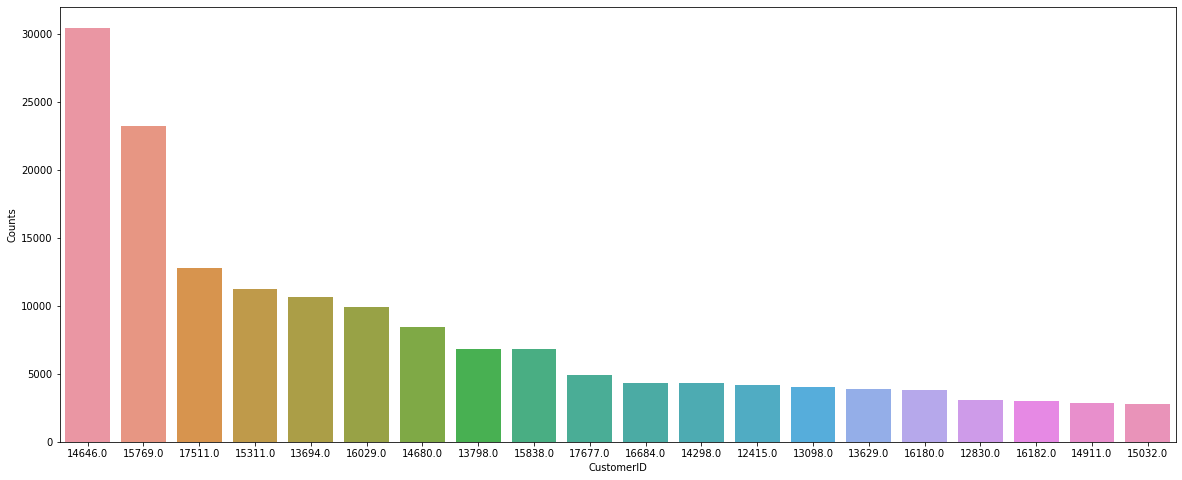

In [261]:
top_customers('bag')

## Cake

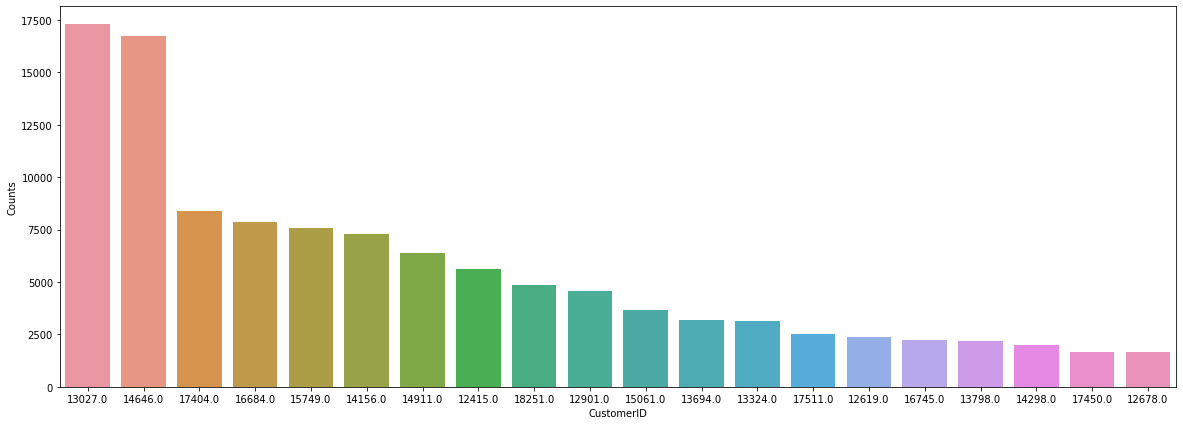

In [262]:
top_customers('cake')

### Box

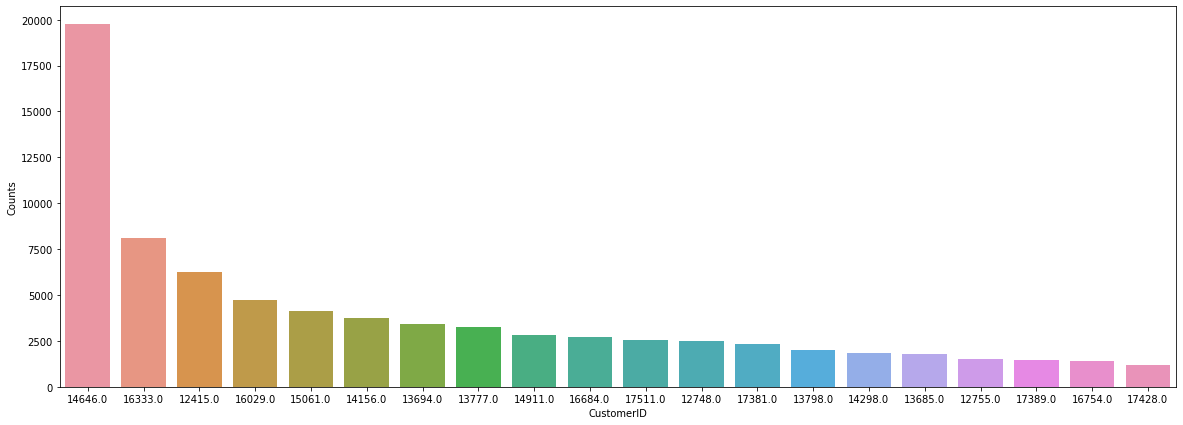

In [283]:
top_customers('box')

### Clock

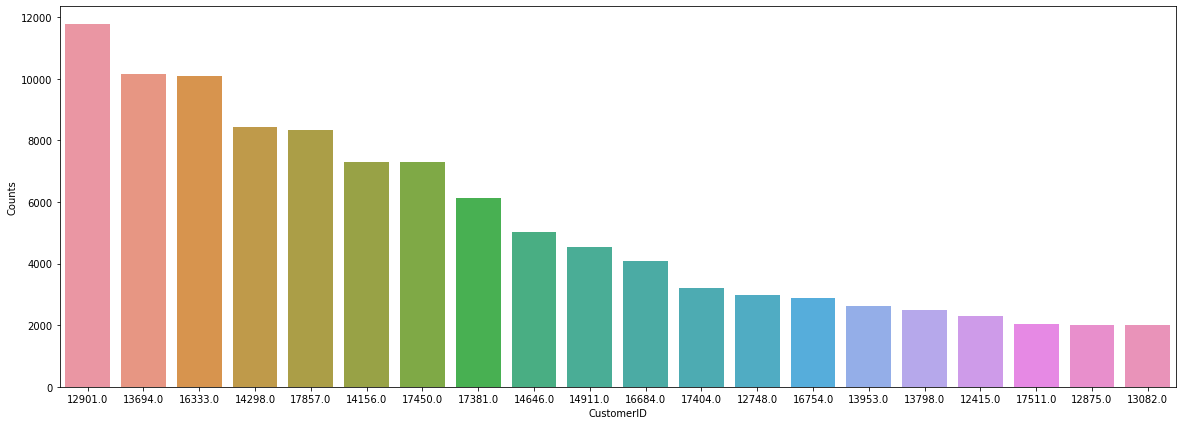

In [264]:
top_customers('clock')

### Kids

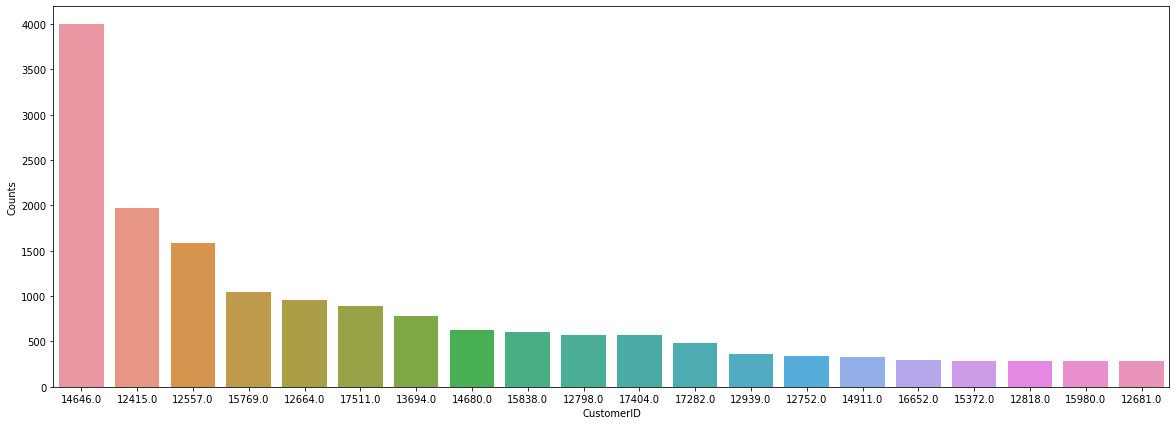

In [266]:
top_customers('kids')

### Christmas

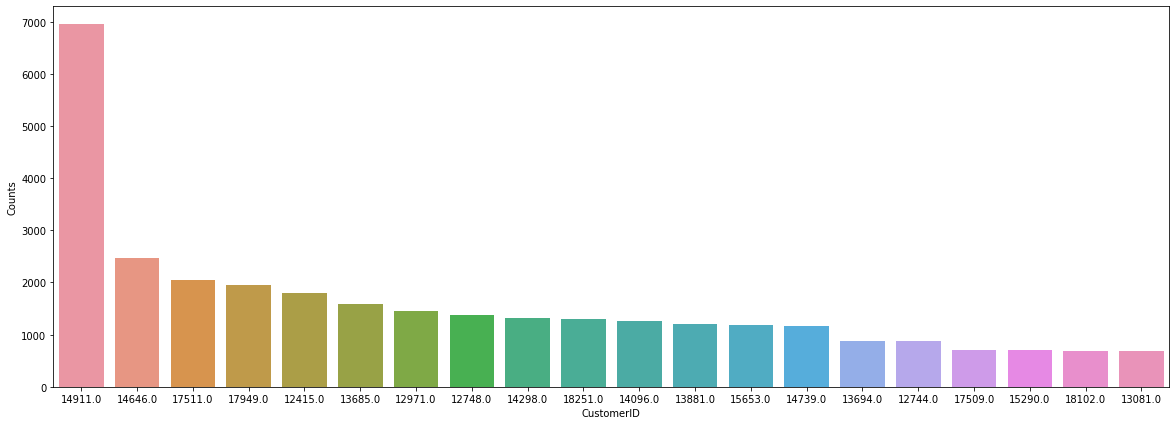

In [265]:
top_customers('christmas')

### Holder

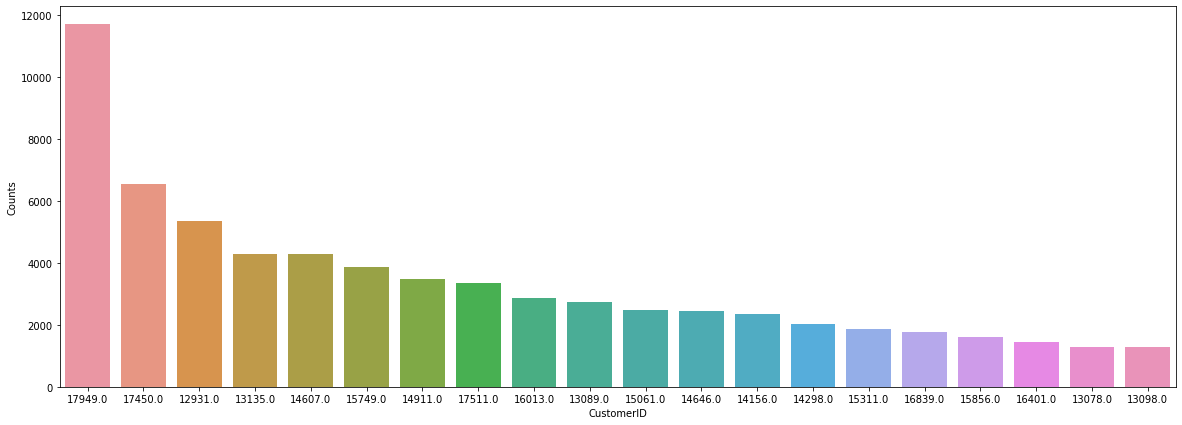

In [93]:
top_customers('holder')

### Card

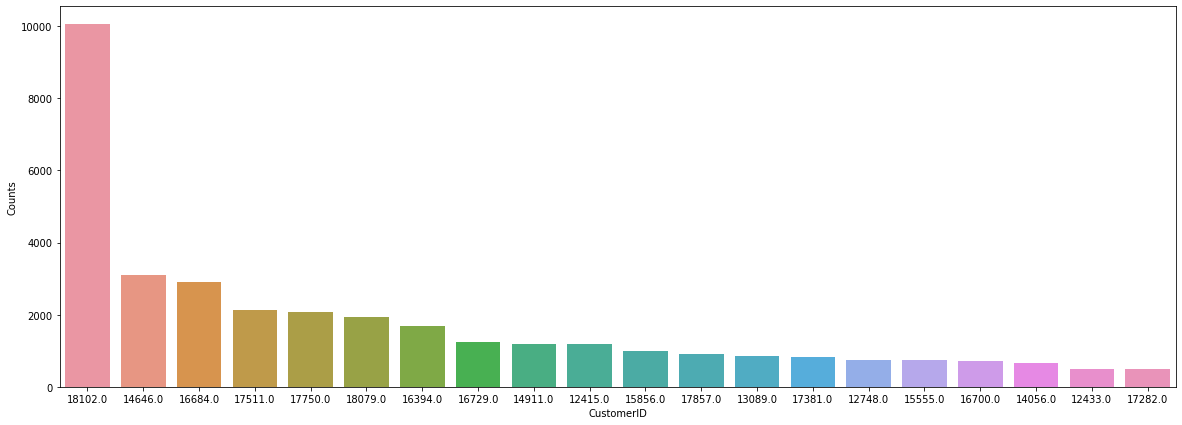

In [123]:
top_customers('card')

### Bunting

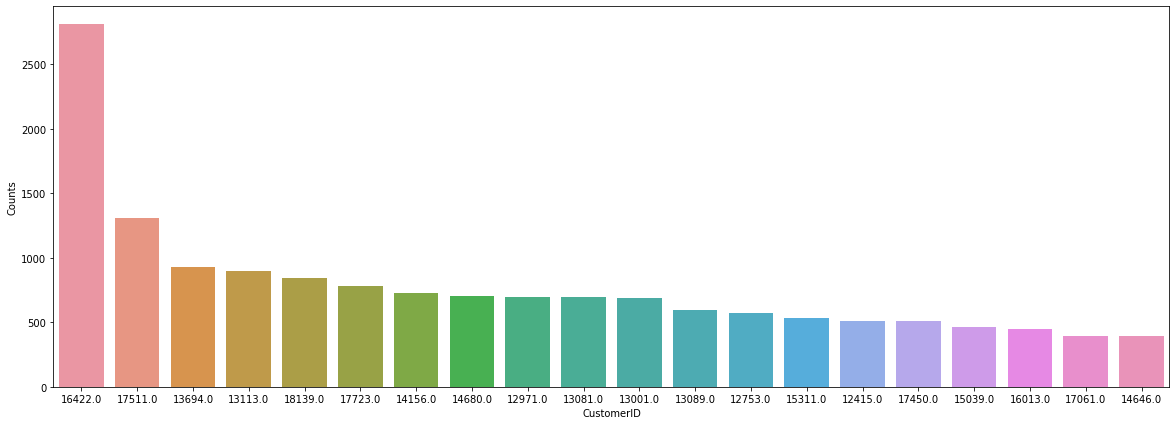

In [282]:
top_customers('bunting')

### Bottle

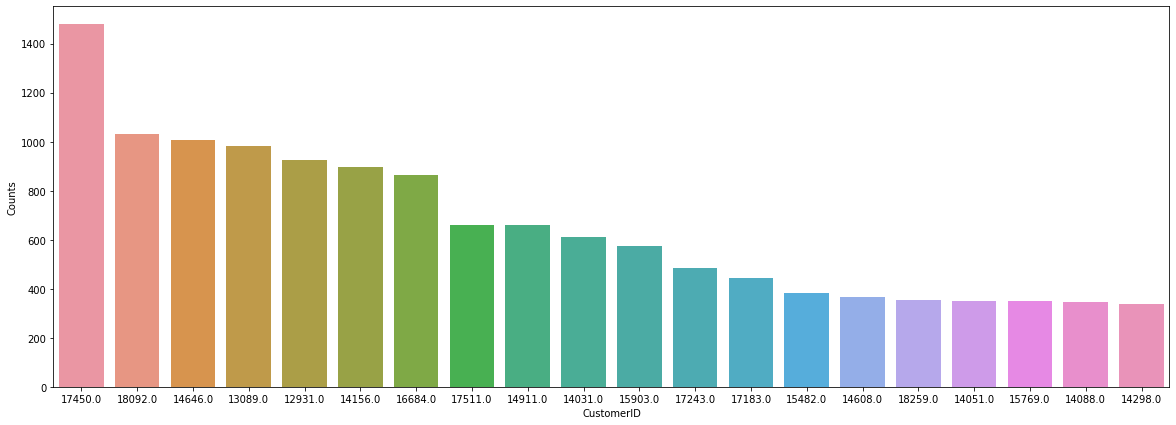

In [97]:
top_customers('bottle')

### Antique

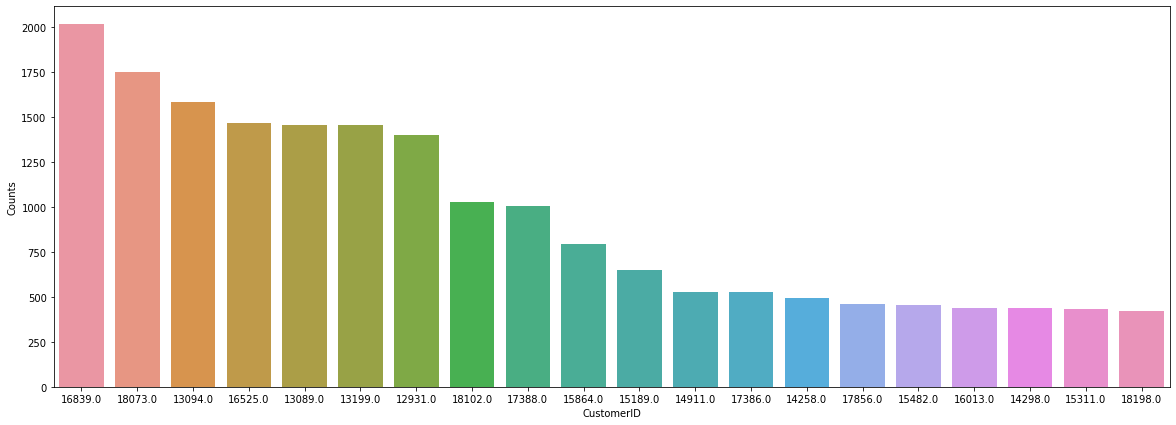

In [98]:
top_customers('antique')

### Doormat

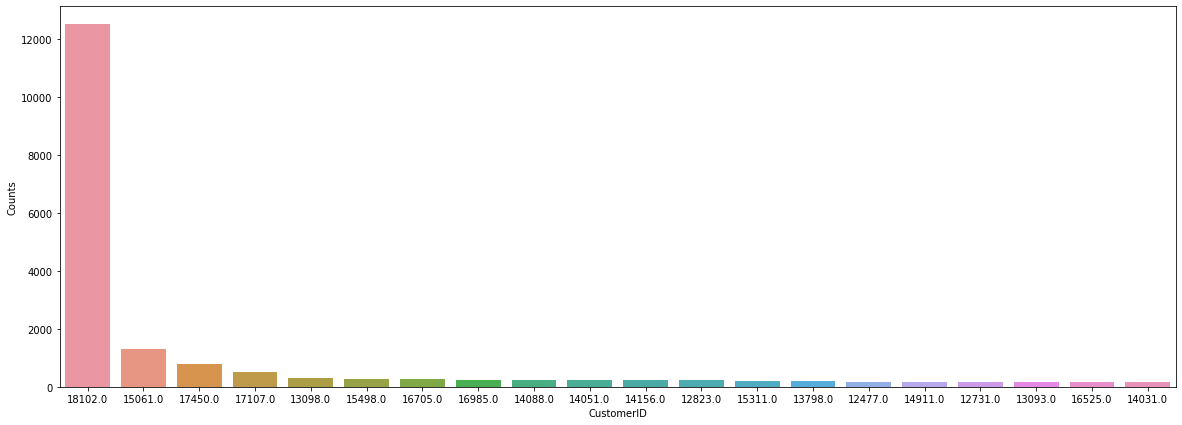

In [278]:
top_customers('doormat')

### Birthday

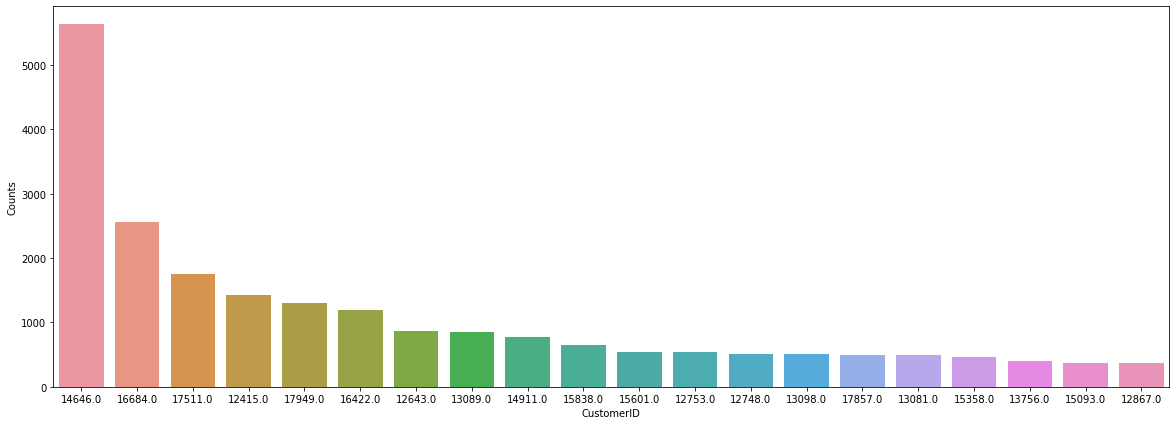

In [101]:
top_customers('birthday')

### Decoration

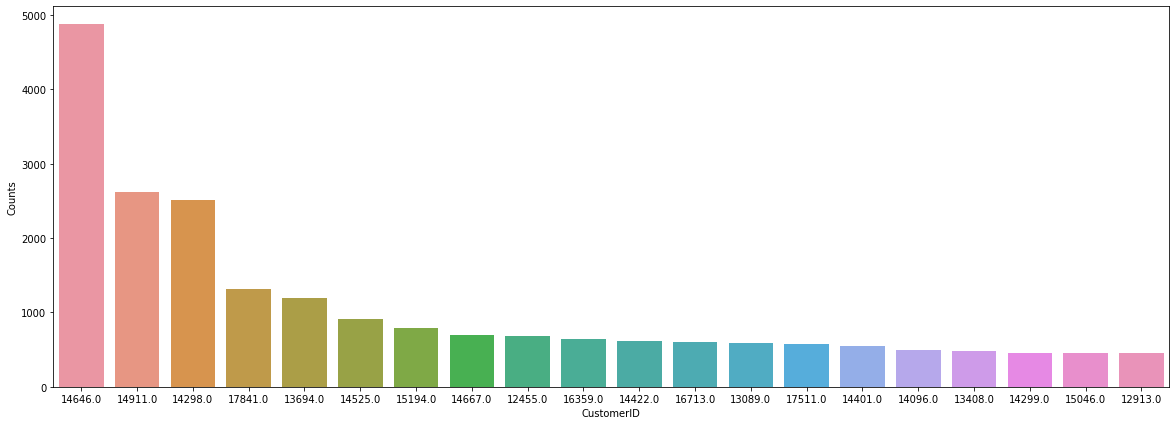

In [100]:
top_customers('decoration')

### Candles

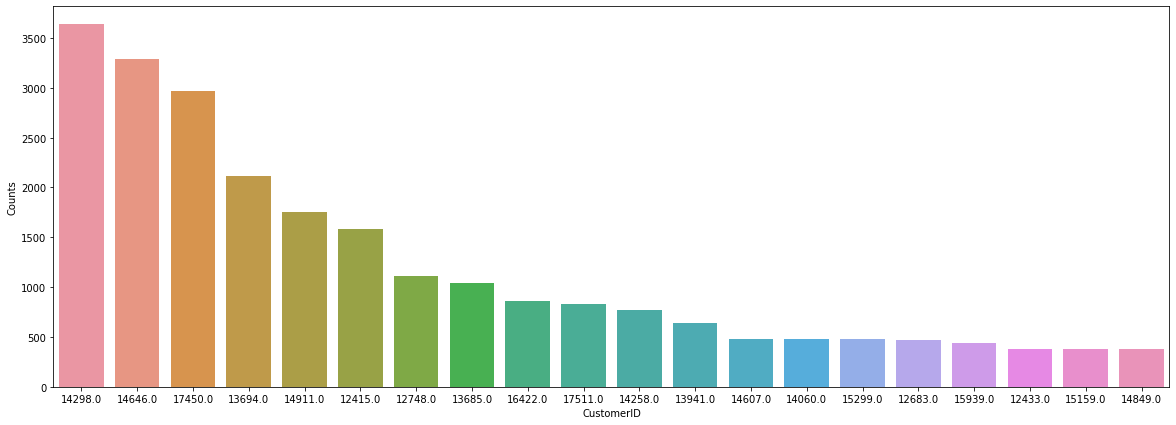

In [277]:
top_customers('candles')

### Ceramics

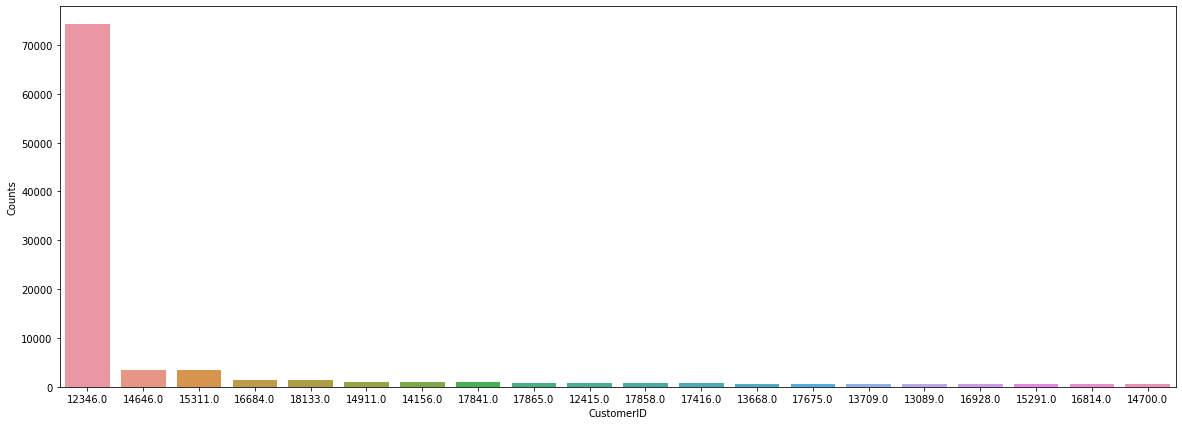

In [280]:
top_customers('ceramic')

### Bowl

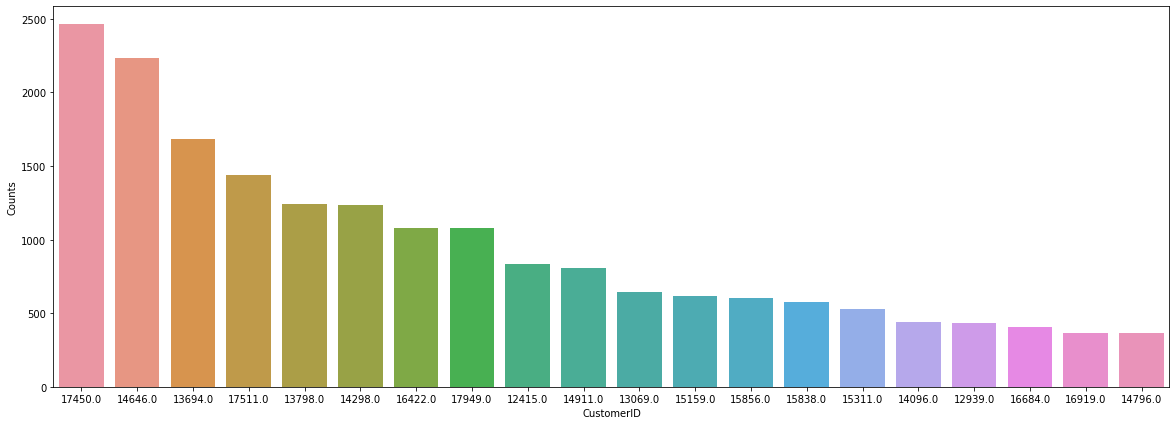

In [281]:
top_customers('bowl')

### Glass

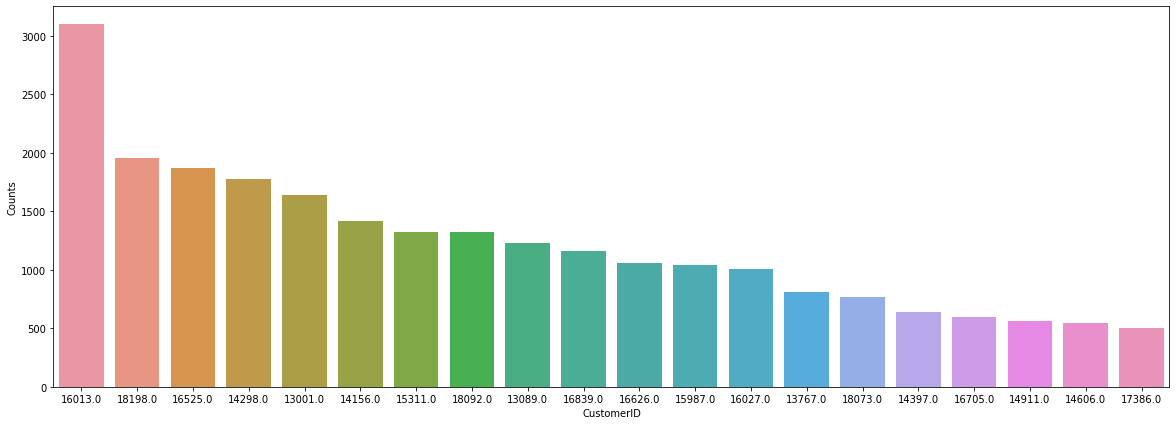

In [102]:
top_customers('glass')

# Lights

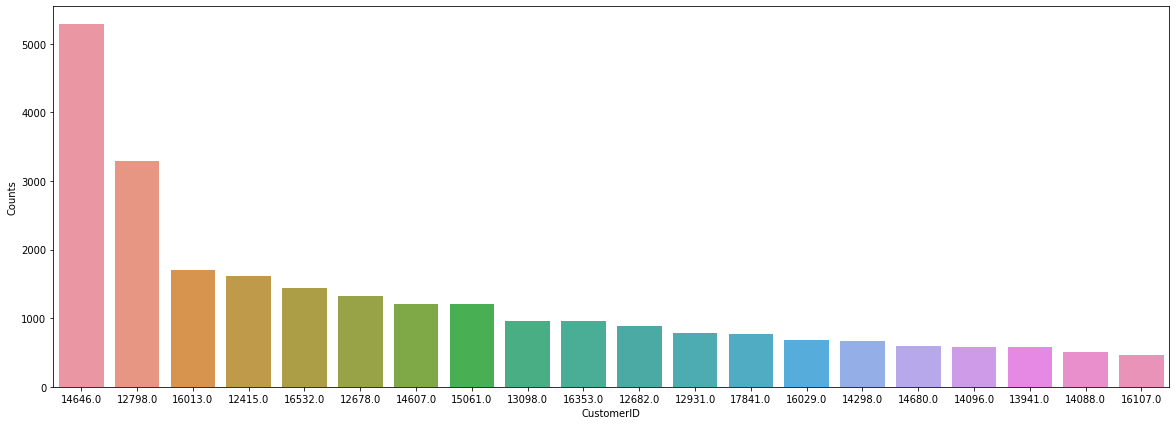

In [279]:
top_customers('light')

### Home

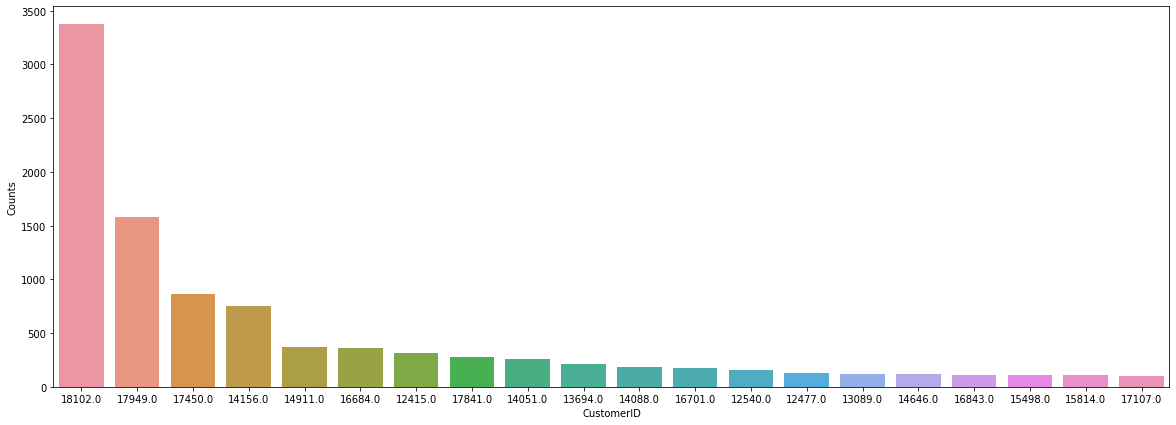

In [267]:
top_customers('home')

# Customers with Unknown CustomerID

In [26]:
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom


### Pre-Processing

In [18]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
import re
df3['Description'] = df3.Description.apply(lambda x: re.sub('[^a-zA-Z]',' ',x))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
l111 = cv.fit_transform(df3.Description)
ll11 = pd.DataFrame(l111.toarray(),columns=cv.get_feature_names())

In [29]:
ll11.head()

,abc,abstract,acapulco,account,acrylic,add,address,adjust,adjustment,adult,...,wreath,writing,wrongly,xmas,yellow,you,your,yuletide,zero,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
features = []
for i in ll11.columns:
  if sum(ll11[i]) > 1000:
    features.append(i)

In [107]:
ll22 = ll11[features]

In [108]:
st = []
for i in features:
  if i in stopwords.words('english'):
    st.append(i)

In [109]:
color = ['red', 'orange', 'yellow', 'green', 'blue', 'black', 'brown','white','pink']

In [110]:
for i in color:
  if i in ll22.columns:
    print(i)

red
green
blue
black
white
pink


In [111]:
adjectives = ['metal','heart', 'assorted', 'design', 'set']
noun = ['bird', 'pack', 'sign','french']
left = ['retrospot', 'colour']
last = ['paper','large', 'regency','tin','small']

In [ ]:
ll22.drop(last,axis=1,inplace=True)

In [113]:
ll22.drop(st,axis=1,inplace=True)

In [114]:
ll22.drop(adjectives, axis=1, inplace=True)

In [115]:
ll22.drop(noun, axis=1, inplace=True)


In [116]:
ll22.drop(['red',  'green', 'blue', 'black','white','pink'],axis=1,inplace=True)
ll22.drop(left,axis=1,inplace=True)

In [117]:
j11 = ll22.idxmax(axis=1)

In [118]:
df3.index = np.arange(0,len(j11),1)
d5 = pd.concat([df3,j11],axis=1)
d5.rename(columns={0: 'Category'},inplace=True)

In [119]:
cols = ['CustomerID', 'Description','Category', 'Quantity', 'InvoiceNo', 'InvoiceDate',
       'UnitPrice','StockCode', 'Country']
d6 = d5[cols]

In [120]:
d6['Category'] = d6['Category'].str.replace('hanging', 'holder')
d6['Category'] = d6['Category'].str.replace('baking', 'cake')
d6['Category'] = d6['Category'].str.replace('alarm', 'clock')
d6['Category'] = d6['Category'].str.replace('boxes', 'box')
d6['Category'] = d6['Category'].str.replace('cakes', 'cake')
d6['Category'] = d6['Category'].str.replace('decorations', 'decoration')
d6['Category'] = d6['Category'].str.replace('dolly', 'doll')
d6['Category'] = d6['Category'].str.replace('bells', 'bell')
d6['Category'] = d6['Category'].str.replace('childs', 'kids')
d6['Category'] = d6['Category'].str.replace('childrens', 'kids')
d6['Category'] = d6['Category'].str.replace('diner', 'dinner')
d6['Category'] = d6['Category'].str.replace('teatime', 'tea')
d6['Category'] = d6['Category'].str.replace('lights', 'light')
d6['Category'] = d6['Category'].str.replace('cards', 'card')
d6['Category'] = d6['Category'].str.replace('candle', 'candles')
d6['Category'] = d6['Category'].str.replace('candless', 'candles')

### Top 20 Products Categories for Unknown Customers 

In [135]:
qua = []
for i in d6.Category.unique():
  qua.append(sum(d6[d6.Category == i].Quantity))

In [142]:
e11 = pd.DataFrame({'Category': d6.Category.unique(), 'Total Quantity': qua})
e11 = e11.sort_values('Total Quantity', ascending = False).iloc[0:20]

In [143]:
e11

,Category,Total Quantity
2,antique,115943
14,bag,67879
5,christmas,27193
31,holder,18959
9,box,16348
17,cake,15392
28,decoration,11175
0,bottle,11054
33,light,9087
4,card,8234


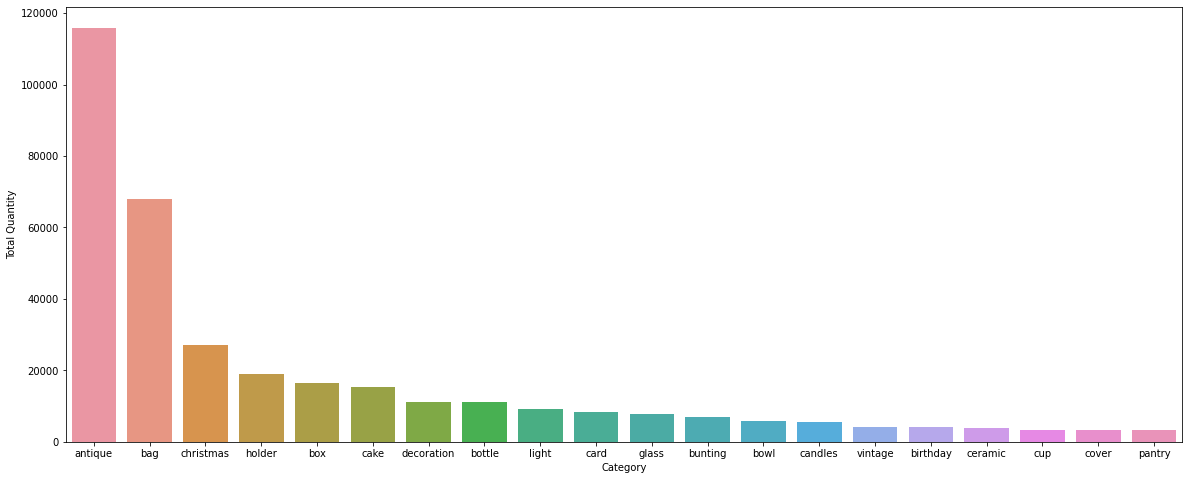

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'Category', y ='Total Quantity', data = e11, order = e11.sort_values('Total Quantity', ascending = False).Category )
plt.rcParams['figure.figsize'] = [20,8]

So, our unknown customers are buying more 'antique' products that 'bag' which is different from what we have previously seen.